In [1]:
import os
import random
import re
import time

import pandas as pd
import numpy as np

import sklearn
import torch

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc={"axes.unicode_minus":False},
        style='darkgrid')
  
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
  torch.cuda.manual_seed(SEED)

## Download & Check Data

### train data

In [2]:
data_dir = '../data/train/'
data_path = os.path.join(data_dir, 'train_ratings.csv')
train_df = pd.read_csv(data_path)

In [3]:
train_df.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


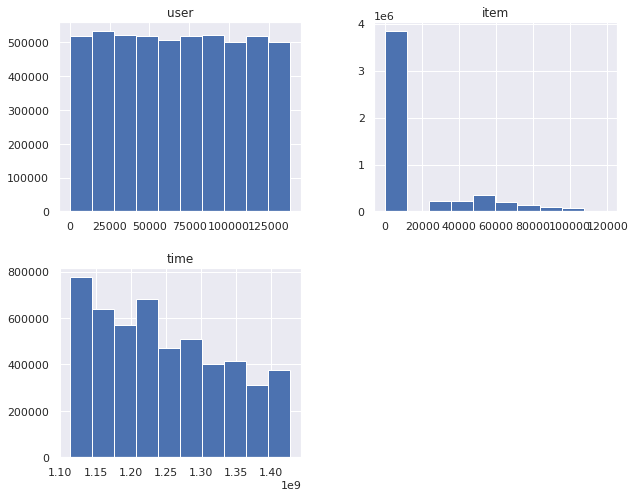

In [4]:
train_df[['user', 'item', 'time']].hist(figsize=(10, 8));

### side info data

In [5]:
year_data_path = os.path.join(data_dir, 'years.tsv')
writer_data_path = os.path.join(data_dir, 'writers.tsv')
title_data_path = os.path.join(data_dir, 'titles.tsv')
genre_data_path = os.path.join(data_dir, 'genres.tsv')
director_data_path = os.path.join(data_dir, 'directors.tsv')

In [6]:
year_data = pd.read_csv(year_data_path, sep='\t')
writer_data = pd.read_csv(writer_data_path, sep='\t')
title_data = pd.read_csv(title_data_path, sep='\t')
genre_data = pd.read_csv(genre_data_path, sep='\t')
director_data = pd.read_csv(director_data_path, sep='\t')

In [7]:
director_df = pd.merge(train_df, director_data, on=['item'])
genre_df = pd.merge(train_df, genre_data, on=['item'])
title_df = pd.merge(train_df, title_data, on=['item'])
writer_df = pd.merge(train_df, writer_data, on=['item'])
year_df = pd.merge(train_df, year_data, on=['item'])

## Preprocessing

### time

### director

### genre

#### 장르별 영화 분포 시각화

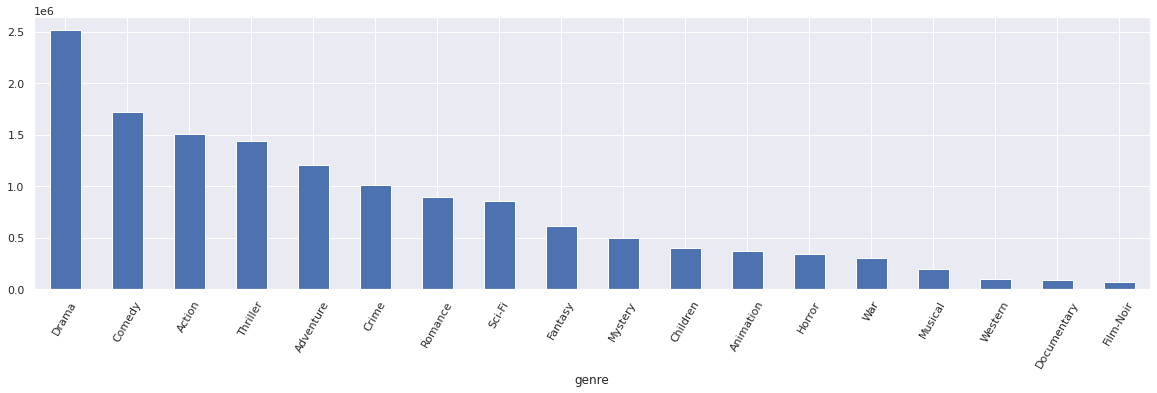

In [8]:
plt.figure(figsize=(20, 5))
genre_df.genre.value_counts().plot(kind='bar', rot=60);

In [9]:
agg_genre_data = genre_data.groupby('item', as_index=False).agg(lambda x:x.to_list())
agg_genre_df = pd.merge(train_df, agg_genre_data, on=['item'])
agg_genre_df.head()

,user,item,time,genre
0,11,4643,1230782529,"[Action, Adventure, Drama, Sci-Fi]"
1,189,4643,1302945016,"[Action, Adventure, Drama, Sci-Fi]"
2,294,4643,1288437662,"[Action, Adventure, Drama, Sci-Fi]"
3,383,4643,1261996844,"[Action, Adventure, Drama, Sci-Fi]"
4,421,4643,1190624541,"[Action, Adventure, Drama, Sci-Fi]"


### title

### writer

### year

In [10]:
title_df['year'] = title_df.title.str[-5:-1]
title_df.title = title_df.title.str[:-6]

In [11]:
title_df

,user,item,time,title,year
0,11,4643,1230782529,Planet of the Apes,2001
1,189,4643,1302945016,Planet of the Apes,2001
2,294,4643,1288437662,Planet of the Apes,2001
3,383,4643,1261996844,Planet of the Apes,2001
4,421,4643,1190624541,Planet of the Apes,2001
...,...,...,...,...,...
5154466,126426,102880,1386260290,After Earth,2013
5154467,127766,102880,1386261575,After Earth,2013
5154468,130972,102880,1391096866,After Earth,2013
5154469,131347,102880,1370143675,After Earth,2013


### time

In [12]:
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))

initial unix-based timestamp: 1230782529
converted time: 2009-01-01 04:02:09
